## 가위바위보 분류기 만들기

웹캠을 사용하여 데이터를 준비해봅시다!  

1) 데이터 만들기
노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지를 각각 100장을 만들어봅시다.  

- https://teachablemachine.withgoogle.com/

2) 가위 이미지 데이터 만들기

웹캠 앞에서 포즈를 가위 포즈를 취한 후, <Hold to Record>버튼을 누르면 이미지가 캡쳐됩니다. 
- 여러 각도에서 찍기
- 여러 크기로 찍기
- 배경이 깔끔할 수록 좋음 (단색배경)

![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-9.max-800x600.png)

![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-10.max-800x600.png)

3) 100장의 가위 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드 합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-1-11.png)

4) 가위 이미지들을 "scissor.zip"이라는 파일 이름으로 본인 컴퓨터에 저장해봅시다.
바위와 보 이미지들에 대해서도 위 과정을 진행해주세요!  
(각각, "rock.zip", "paper.zip", 이름을 저장해주세요!)

- 이미지 예시  
`ock_scissor_paper/paper` 폴더 내 이미지들은 아래와 같이 저장이 되어 있을 것입니다.



![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-12.max-800x600.png)

5) 데이터불러오기 + Resize하기  

숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해봅시다

In [3]:
## 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# ## 학습데이터.zip 업로드
# from google.colab import files
# file_uploaded = files.upload()

In [ ]:
# https://learn.akamai.com/en-us/webhelp/netstorage/netstorage-user-guide/GUID-80C7B749-F9BB-4271-A138-AEEED1070D11.html
!unzip "Class1-samples.zip" -d "./Class1-samples" # 안에 있는 폴더 나옴

#!unzip "scissor.zip" -d "./scissor"
#!unzip "paper.zip" -d "./paper"
#!unzip "rock.zip" -d "./rock"

unzip:  cannot find or open Class1-samples.zip, Class1-samples.zip.zip or Class1-samples.zip.ZIP.


In [2]:
import os, glob

import random

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image

In [15]:
# def new_idxing(file_path):
#     papers = glob.glob(file_path + "/paper/*/*.jpg")
#     rocks = glob.glob(file_path + "/rock/*/*.jpg")
#     scissors = glob.glob(file_path + "/scissor/*/*.jpg")
#     p_size = len(papers)
#     r_size = len(rocks)
#     s_size = len(scissors)

#     save_path = file_path + "Papers/"
#     for i, img in tqdm(enumerate(papers)):
#         image = Image.open(img)
#         image.save(save_path + f"{i}.jpg", "JPEG")
    
#     save_path = file_path + "Rocks/"
#     for i, img in tqdm(enumerate(rocks)):
#         image = Image.open(img)
#         image.save(save_path + f"{i}.jpg", "JPEG")

#     save_path = file_path + "Scissiors/"
#     for i, img in tqdm(enumerate(scissors)):
#         image = Image.open(img)
#         image.save(save_path + f"{i}.jpg", "JPEG")

# file_path = '/content/drive/MyDrive/data/rsp2/'
# new_idxing(file_path)

In [6]:
def resize_images(img_path):  # 224 x 224 -> 28 x 28	
	images=glob.glob(img_path + "/*/*.jpg")
	print(len(images), " images to be resized.")
	
	# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in tqdm(images):
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
		
	print(len(images), f" images resized.")

In [39]:
image_dir_path = '/content/drive/MyDrive/data/rsp'
glob.iglob(image_dir_path + '/*/*.jpg')
glob.glob(image_dir_path + '/*/*.jpg')

['/content/drive/MyDrive/data/rsp/rock/15.jpg',
 '/content/drive/MyDrive/data/rsp/rock/71.jpg',
 '/content/drive/MyDrive/data/rsp/rock/61.jpg',
 '/content/drive/MyDrive/data/rsp/rock/8.jpg',
 '/content/drive/MyDrive/data/rsp/rock/70.jpg',
 '/content/drive/MyDrive/data/rsp/rock/59.jpg',
 '/content/drive/MyDrive/data/rsp/rock/75.jpg',
 '/content/drive/MyDrive/data/rsp/rock/66.jpg',
 '/content/drive/MyDrive/data/rsp/rock/58.jpg',
 '/content/drive/MyDrive/data/rsp/rock/64.jpg',
 '/content/drive/MyDrive/data/rsp/rock/65.jpg',
 '/content/drive/MyDrive/data/rsp/rock/49.jpg',
 '/content/drive/MyDrive/data/rsp/rock/60.jpg',
 '/content/drive/MyDrive/data/rsp/rock/62.jpg',
 '/content/drive/MyDrive/data/rsp/rock/88.jpg',
 '/content/drive/MyDrive/data/rsp/rock/76.jpg',
 '/content/drive/MyDrive/data/rsp/rock/74.jpg',
 '/content/drive/MyDrive/data/rsp/rock/89.jpg',
 '/content/drive/MyDrive/data/rsp/rock/63.jpg',
 '/content/drive/MyDrive/data/rsp/rock/77.jpg',
 '/content/drive/MyDrive/data/rsp/rock/48

In [8]:
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
resize_images(image_dir_path)

300  images to be resized.


100%|██████████| 300/300 [01:04<00:00,  4.62it/s]

300  images resized.


In [16]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
     
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).\
                                reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("총 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "./srp"
(x_data, y_data)=load_data(image_dir_path)
x_train_norm = x_data/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_data.shape))
print("y_train shape: {}".format(y_data.shape))

총 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [33]:
glob.glob("패스")

[]

### Image => numpy

In [17]:
Image.open('/content/drive/MyDrive/data/rsp/rock/15.jpg')

In [18]:
np.array(Image.open('/content/drive/MyDrive/data/rsp/rock/15.jpg'))

array([[[ 91,  71,  47],
        [ 91,  71,  47],
        [ 90,  70,  46],
        ...,
        [103,  87,  62],
        [102,  86,  63],
        [100,  84,  61]],

       [[ 89,  69,  45],
        [ 88,  68,  44],
        [ 88,  67,  46],
        ...,
        [101,  85,  62],
        [100,  84,  61],
        [ 99,  83,  60]],

       [[ 85,  64,  43],
        [ 85,  64,  43],
        [ 83,  65,  43],
        ...,
        [ 98,  82,  59],
        [ 97,  81,  58],
        [ 96,  79,  59]],

       ...,

       [[255, 245, 243],
        [255, 245, 243],
        [255, 249, 247],
        ...,
        [106,  93,  84],
        [ 96,  81,  74],
        [ 89,  74,  67]],

       [[240, 238, 239],
        [239, 237, 238],
        [239, 237, 240],
        ...,
        [106,  93,  85],
        [ 97,  84,  78],
        [ 93,  78,  73]],

       [[243, 247, 248],
        [233, 237, 240],
        [230, 234, 237],
        ...,
        [ 95,  82,  76],
        [ 88,  75,  69],
        [ 86,  71,  66]]

### data visualization

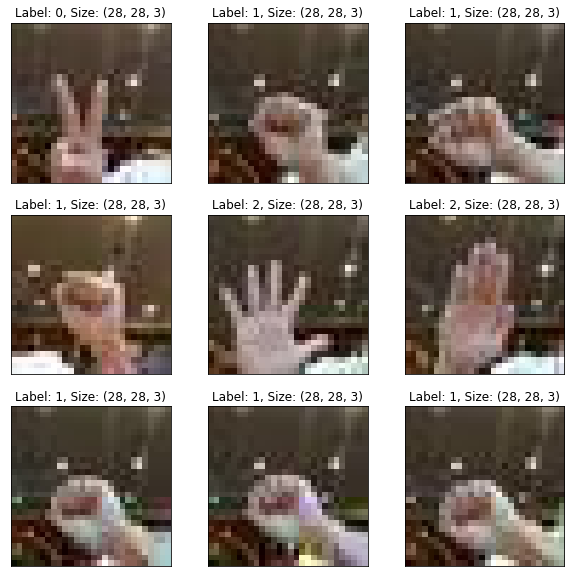

In [19]:
def vis(x,y):
    # random.seed(2021)
    fig = plt.figure(figsize=(10, 10))
    for i in range(9):
        idx = random.randint(0,300)
        img = x[idx]
        label = y[idx]
        ax = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
        ax.imshow(img)
        ax.set_title(f"Label: {label}, Size: {img.shape}")

vis(x_train_norm, y_data)

### 데이터 shuffle

In [20]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train_norm, y_data, random_state=0)

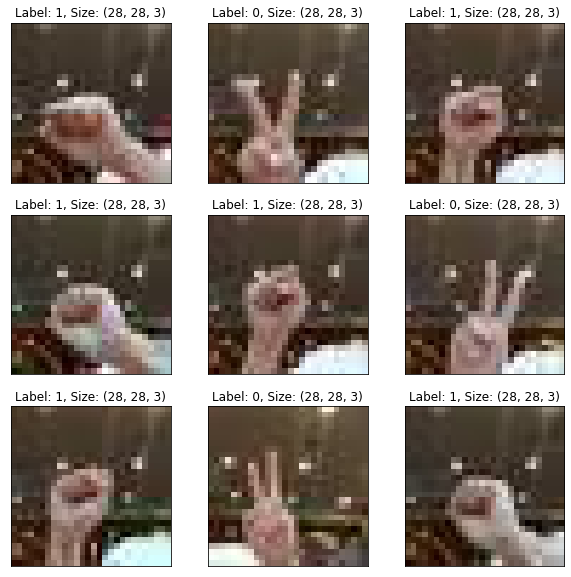

In [21]:
vis(x_train, y_train)

In [22]:
y_train

array([2, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2,
       2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2,
       1, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1,
       0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2,
       1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2,
       0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2,
       2, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1], d


## 딥러닝 네트워크 설계하기

In [36]:
glob.glob("./paper-samples")

[]

In [29]:
model_d = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

In [24]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), padding='same',
                              kernel_regularizer='l2',
                              input_shape=(28, 28, 3)))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(16, (3, 3), padding='same',
                              kernel_regularizer='l2'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(3, activation='softmax',
                             kernel_regularizer='l2'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 16)       

## 딥러닝 네트워크 학습시키기

In [ ]:
(28,28,3) => test1 => model()
model <= (Num, 28, 28, 3)
test1.reshape(-1, 28, 28, 3) => (3, 28, 28, 3)

In [27]:
print("Befor Reshape - x_train shape : {}".format(x_train.shape))
x_train_reshape = x_train.reshape(-1, 28, 28, 3)
print("After Reshape - x_train_reshaped shape : {}".format(x_train_reshape.shape))

Befor Reshape - x_train shape : (300, 28, 28, 3)


In [25]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
10/10 [==============================] - 1s 6ms/step - loss: 1.1420 - accuracy: 0.6033
Epoch 2/3
10/10 [==============================] - 0s 6ms/step - loss: 0.4785 - accuracy: 0.9867
Epoch 3/3
10/10 [==============================] - 0s 7ms/step - loss: 0.3486 - accuracy: 1.0000


In [26]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
print("test_loss : {}".format(train_loss))
print("test_accuracy: {}".format(train_acc))

10/10 - 0s - loss: 1.2418 - accuracy: 0.5300
test_loss : 1.2417806386947632
test_accuracy: 0.5299999713897705


## 테스트하기

In [27]:
from PIL import Image
import os, glob

In [28]:
image_dir_path = '/content/drive/MyDrive/data/rsp/test'
resize_images(image_dir_path)

300  images to be resized.


100%|██████████| 300/300 [01:05<00:00,  4.56it/s]

300  images resized.


In [29]:
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/255.0
x_test_reshape = x_test_norm.reshape(-1, 28, 28, 3)

print("x_test: {}".format(x_test.shape))
print("y_test : {}".format(y_test.shape))

총 이미지 개수는 300 입니다.
x_test: (300, 28, 28, 3)
y_test : (300,)


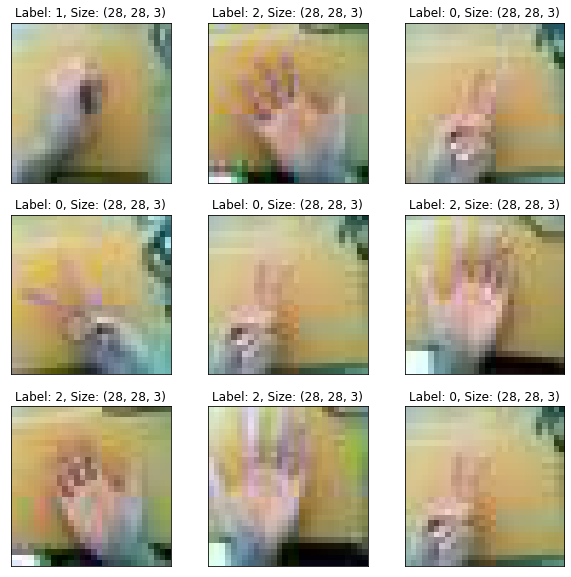

In [30]:
vis(x_test_reshape, y_test)

In [31]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

test_loss, test_accuracy = model.evaluate(x_test_reshape, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.4150 - accuracy: 0.2600
test_loss : 1.4149653911590576
test_accuracy: 0.25999999046325684


## 어떻게 하면 test 정확도를 높일 수 있을까?
=> over-fitting  
1. 모델의 복잡도를 낮춘다.
2. train data의 양을 늘린다.
3. 모델의 아키텍쳐를 바꾼다.
4. 규제항을 추가한다.

In [ ]:
train => 모델이 파라미터를 업데이트할때 사용되는 데이터

validation => 모델의 성능을 확인하기 위한 용 => 모델 학습 파이프라인을 수정할 수 있다.



test => 최종적으로 모델을 배포했들때 기대되는 성능 0.82 => 딥러닝 모델을 수정

In [ ]:
train, validation, test

data => train / test
train => train / validation

val, test => 학습 x 평가 0

고양이 / 강아지 분류기를 만들고 싶다.

구글 => 고양이 강아지 사진을 쭉 크롤링 => 초고화질 고양이/강아지
train, val => 학습

사람들이 찍는 고양이 강아지 => 저화질, 분포가 다르다.

모델의 성능은 떨어진다.

모델의 목적은 => train < test
모델은 핸드폰에 올라가서 사람들이 찍는 사진을 분류하는 거다.

train valid <= [고화질, 저화질]

"일반화"